####First, create the neighborhoods feature

In [1]:
#Imports here
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import fiona
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point, Polygon, MultiPoint, MultiPolygon
from shapely.prepared import prep

In [2]:
df = pd.read_pickle('df_first757_cleaned.pkl')

In [3]:
df.head(3)

,OBJECTID,WOKEY,LOCATION,ADDRDESC,INITDT_dt,FLDSTARTDT_dt,FLDENDDT_dt,DURATION,DURATION_td,latitude,longitude,address,address_detail
0,1,2456,Holden pl SW bt SW Kenyon Holden ...,HOLDEN PL SW BETWEEN SW HOLDEN ST AND SW KENYO...,2010-03-29 07:00:00,2010-04-06 07:00:00,2010-04-06 07:00:00,8 days,8,47.531858,-122.363186,"SW Kenyon St, Seattle, WA, USA","2438 SW Kenyon St, Seattle, WA 98106, USA"
1,2,2514,"NE Pacific Street, one block west of Montlake ...",MONTLAKE BLVD NE AND NE PACIFIC ST ...,2010-03-30 07:00:00,2010-04-01 07:00:00,2010-04-01 07:00:00,2 days,2,47.649014,-122.304655,"Montlake Blvd NE & NE Pacific St, Seattle, WA ...","3705-3707 Montlake Blvd NE, Seattle, WA 98105,..."
2,3,2649,32nd Ave NE and NE 135th ...,NE 135TH ST BETWEEN 32ND AVE NE AND LAKE CITY ...,2010-03-31 07:00:00,2010-04-01 07:00:00,2010-04-01 07:00:00,1 days,1,47.707446,-122.301566,"Lake City Way NE, Seattle, WA, USA","10754-10850 Lake City Way NE, Seattle, WA 9812..."


In [4]:
shapefilename = 'data/Neighborhoods'
shp = fiona.open(shapefilename+'.shp')
coords = shp.bounds
shp.close()

In [5]:
w, h = coords[2] - coords[0], coords[3] - coords[1]
extra = 0.01

In [39]:
len(coords)

4

In [6]:
m = Basemap(
    projection='tmerc', ellps='WGS84',
    lon_0=np.mean([coords[0], coords[2]]),
    lat_0=np.mean([coords[1], coords[3]]),
    llcrnrlon=coords[0] - extra * w,
    llcrnrlat=coords[1] - (extra * h), 
    urcrnrlon=coords[2] + extra * w,
    urcrnrlat=coords[3] + (extra * h),
    resolution='i',  suppress_ticks=True)

_out = m.readshapefile(shapefilename, name='seattle', drawbounds=False, color='none', zorder=2)

In [ ]:
points = [geometry.shape(point['geometry'])
          for point in shapefile]

In [7]:
# set up a map dataframe
df_map = pd.DataFrame({
    'poly': [Polygon(hood_points) for hood_points in m.seattle],
    'name': [hood['S_HOOD'] for hood in m.seattle_info]
})

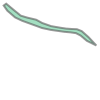

In [44]:
[Polygon(hood_points) for hood_points in m.seattle][0]

In [47]:
m.seattle

[[(12338.19322904486, 22466.72127820574),
  (12329.728073814287, 22470.88609412684),
  (12324.148550708775, 22475.593123905634),
  (12319.990324109249, 22477.769858427033),
  (12315.175043168025, 22478.4666127714),
  (12309.601424959183, 22478.967533574287),
  (12297.525596335377, 22480.684841517046),
  (12289.489605740408, 22482.385725954715),
  (12279.433412516395, 22486.062167097094),
  (12271.680678755321, 22488.86899449691),
  (12265.29582593591, 22491.883516706883),
  (12258.318672834428, 22497.906591647334),
  (12255.026564899901, 22502.5677845271),
  (12257.280699108074, 22504.226647674936),
  (12263.944155920162, 22498.654760260983),
  (12270.294474531896, 22493.505467332405),
  (12275.968075071642, 22491.787026220787),
  (12284.238046820412, 22489.814387269827),
  (12289.630674934164, 22486.870988005514),
  (12297.611957226134, 22484.068661497888),
  (12305.718220566683, 22482.673997562666),
  (12311.06920058457, 22481.863842503266),
  (12315.801232581125, 22481.527519407366)

In [37]:
print m.seattle_info

[{'PERIMETER': 617.843, 'SHAPE_AREA': '0.00000000000e+000', 'OBJECTID': 1, 'S_HOOD': 'OOO', 'AREA': 3588.443, 'RINGNUM': 1, 'SYMBOL': 0, 'L_HOOD': '                          ', 'HOODS_': 2, 'L_HOODID': 0, 'SYMBOL2': 0, 'SHAPE_LEN': '0.00000000000e+000', 'SHAPENUM': 1, 'HOODS_ID': 0}, {'PERIMETER': 733.568, 'SHAPE_AREA': '0.00000000000e+000', 'OBJECTID': 2, 'S_HOOD': 'OOO', 'AREA': 22294.777, 'RINGNUM': 1, 'SYMBOL': 0, 'L_HOOD': '                          ', 'HOODS_': 3, 'L_HOODID': 0, 'SYMBOL2': 0, 'SHAPE_LEN': '0.00000000000e+000', 'SHAPENUM': 2, 'HOODS_ID': 0}, {'PERIMETER': 4088.442, 'SHAPE_AREA': '0.00000000000e+000', 'OBJECTID': 3, 'S_HOOD': 'OOO', 'AREA': 56695.367, 'RINGNUM': 1, 'SYMBOL': 0, 'L_HOOD': '                          ', 'HOODS_': 5, 'L_HOODID': 0, 'SYMBOL2': 0, 'SHAPE_LEN': '0.00000000000e+000', 'SHAPENUM': 3, 'HOODS_ID': 0}, {'PERIMETER': 1809.446, 'SHAPE_AREA': '0.00000000000e+000', 'OBJECTID': 4, 'S_HOOD': 'OOO', 'AREA': 64156.813, 'RINGNUM': 1, 'SYMBOL': 0, 'L_HOO

In [8]:
df_map.head()

,name,poly
0,OOO,"POLYGON ((12338.19322904486 22466.72127820574,..."
1,OOO,"POLYGON ((11322.23854830379 16906.90311193793,..."
2,OOO,"POLYGON ((3229.497971597746 19120.87266739659,..."
3,OOO,"POLYGON ((3002.014374016682 19226.97182663195,..."
4,OOO,"POLYGON ((11249.88175412699 18137.97426609295,..."


In [9]:
df_map['neighborhood_index'] = df_map.index+1

In [10]:
df_map.head()

,name,poly,neighborhood_index
0,OOO,"POLYGON ((12338.19322904486 22466.72127820574,...",1
1,OOO,"POLYGON ((11322.23854830379 16906.90311193793,...",2
2,OOO,"POLYGON ((3229.497971597746 19120.87266739659,...",3
3,OOO,"POLYGON ((3002.014374016682 19226.97182663195,...",4
4,OOO,"POLYGON ((11249.88175412699 18137.97426609295,...",5


Actually, now I know that name does contain actual names of the neigborhoods, though there aren't real names for these first ones.  One weird thing is that I get 121 neighborhoods, but there are only 119 rows in the shapefile attribute table.

In [11]:
# Convert our latitude and longitude into Basemap cartesian map coordinates
mapped_points = [Point(m(mapped_x, mapped_y)) for mapped_x, mapped_y in zip(df['longitude'], 
            df['latitude'])]
all_points = MultiPoint(mapped_points)

In [57]:
MultiPolygon(df['longitude'].tolist(), df['latitude'].tolist())

In [60]:
point = Point(float(df['longitude'][0:5]), float(df['latitude'][0:5]))

TypeError: cannot convert the series to <type 'float'>

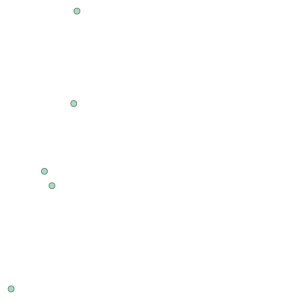

In [35]:
all_points[0:5]

In [12]:
#Associate each mapped pothole with its df index
potholes_tup = []
for hole in xrange(df.shape[0]):
    potholes_tup.append((all_points[hole], df.index.tolist()[hole]))
        

In [15]:
# Use prep to optimize polygons for faster computation

hood_polygons = prep(MultiPolygon(list(df_map['poly'].values))) #I could put tuples in this list, 
                                                                #where the 2nd elem is the neighborhood index.
                                                                #then they're associated with the hood_polygons

In [52]:
list(df_map['poly'].values)

In [16]:
#Associate each neighborhood with its index
neighborhoods_tup = []
for hood in xrange(df_map.shape[0]):
    neighborhoods_tup.append((MultiPolygon(list(df_map['poly'].values))[hood], df_map['neighborhood_index'][hood]))

In [21]:
#Keep the potholes, indices that fall within the neighborhoods
city_points_inds = []
city_points = []
for pt in xrange(len(potholes_tup)):
    for hood in xrange(len(neighborhoods_tup)):
        if neighborhoods_tup[hood][0].contains(potholes_tup[pt][0]):
            city_points.append(potholes_tup[pt][0])
            city_points_inds.append(potholes_tup[pt][1])
            

In [23]:
#Extract the neighborhood index associated with each pothole
neighborhood_cat = []
for pt in xrange(len(city_points)):
    for hood in xrange(len(neighborhoods_tup)):
        if neighborhoods_tup[hood][0].contains(city_points[pt]):
            neighborhood_cat.append(neighborhoods_tup[hood][1])


In [19]:
#Now I just need to create the indexed Series and add it to the dataframe

In [24]:
df['neighborhood_cat'] = pd.Series(neighborhood_cat, index = city_points_inds)

In [25]:
df.head(3)

,OBJECTID,WOKEY,LOCATION,ADDRDESC,INITDT_dt,FLDSTARTDT_dt,FLDENDDT_dt,DURATION,DURATION_td,latitude,longitude,address,address_detail,neighborhood_cat
0,1,2456,Holden pl SW bt SW Kenyon Holden ...,HOLDEN PL SW BETWEEN SW HOLDEN ST AND SW KENYO...,2010-03-29 07:00:00,2010-04-06 07:00:00,2010-04-06 07:00:00,8 days,8,47.531858,-122.363186,"SW Kenyon St, Seattle, WA, USA","2438 SW Kenyon St, Seattle, WA 98106, USA",93
1,2,2514,"NE Pacific Street, one block west of Montlake ...",MONTLAKE BLVD NE AND NE PACIFIC ST ...,2010-03-30 07:00:00,2010-04-01 07:00:00,2010-04-01 07:00:00,2 days,2,47.649014,-122.304655,"Montlake Blvd NE & NE Pacific St, Seattle, WA ...","3705-3707 Montlake Blvd NE, Seattle, WA 98105,...",42
2,3,2649,32nd Ave NE and NE 135th ...,NE 135TH ST BETWEEN 32ND AVE NE AND LAKE CITY ...,2010-03-31 07:00:00,2010-04-01 07:00:00,2010-04-01 07:00:00,1 days,1,47.707446,-122.301566,"Lake City Way NE, Seattle, WA, USA","10754-10850 Lake City Way NE, Seattle, WA 9812...",105


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 757 entries, 0 to 1000
Data columns (total 14 columns):
OBJECTID            757 non-null int64
WOKEY               757 non-null int64
LOCATION            757 non-null object
ADDRDESC            757 non-null object
INITDT_dt           757 non-null datetime64[ns]
FLDSTARTDT_dt       757 non-null datetime64[ns]
FLDENDDT_dt         757 non-null datetime64[ns]
DURATION            757 non-null timedelta64[ns]
DURATION_td         757 non-null float64
latitude            757 non-null float64
longitude           757 non-null float64
address             757 non-null object
address_detail      757 non-null object
neighborhood_cat    732 non-null float64
dtypes: datetime64[ns](3), float64(4), int64(2), object(4), timedelta64[ns](1)
memory usage: 88.7+ KB


Notice missing values where potholes fall outside the mapped/neighborhood boundaries.  Will drop them.

In [28]:
df[pd.isnull(df.neighborhood_cat)].shape

(25, 14)

In [31]:
df_neighborhoods = df[pd.isnull(df.neighborhood_cat) != True].copy()

In [32]:
df_neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 0 to 1000
Data columns (total 14 columns):
OBJECTID            732 non-null int64
WOKEY               732 non-null int64
LOCATION            732 non-null object
ADDRDESC            732 non-null object
INITDT_dt           732 non-null datetime64[ns]
FLDSTARTDT_dt       732 non-null datetime64[ns]
FLDENDDT_dt         732 non-null datetime64[ns]
DURATION            732 non-null timedelta64[ns]
DURATION_td         732 non-null float64
latitude            732 non-null float64
longitude           732 non-null float64
address             732 non-null object
address_detail      732 non-null object
neighborhood_cat    732 non-null float64
dtypes: datetime64[ns](3), float64(4), int64(2), object(4), timedelta64[ns](1)
memory usage: 85.8+ KB


In [33]:
df_neighborhoods.to_pickle('df_neighborhoods.pkl')